**Лабораторна робота 4**

**студента групи ФІТ 4-4**

**Сакуна Владислава Олександровича**

Тема: GAN. Фрактали

**Завдання 1.** Розробити власну архітектуру GAN для датасету fashion mnist  для побудови реалістичного зображення певного типу одягу, наприклад, штанів, футболки, сукні.
Необхідно завантажити датасет, вивести типи одягу, що містить датасет.
Підготувати дані, підібрати кількість шарів, функції активації і тд.
Побудувати графік функції втрат, вивести значення функції втрат. Вивести результат.

**Завдання 2.**Намалювати крижинку Коха з можливістю вибору рівня рекурсії.

**Завдання 3.** Намалювати килим Серпинського.

**Завдання 1**

Показано результат, скорочений до останніх рядків (5000).
2/2 [==============================] - 0s 5ms/step
16000 [D loss: 0.006744, acc.: 100.00%] [G loss: 2.443135]
2/2 [==============================] - 0s 7ms/step
17000 [D loss: 0.066811, acc.: 99.22%] [G loss: 0.760726]
2/2 [==============================] - 0s 6ms/step
18000 [D loss: 0.057010, acc.: 96.88%] [G loss: 3.049375]
2/2 [==============================] - 0s 6ms/step
19000 [D loss: 0.031362, acc.: 99.22%] [G loss: 6.984363]
1/1 [==============================] - 0s 121ms/step


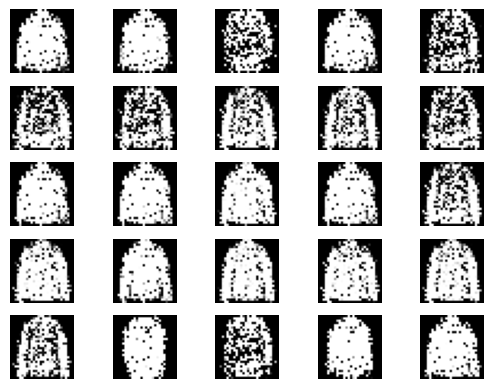

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam

(x_train, _), (_, _) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Типи одягу:", class_names)

x_train = x_train.astype('float32') / 255.0
x_train = np.reshape(x_train, (-1, 28, 28, 1))

img_shape = (28, 28, 1)
z_dim = 100

def build_generator(z_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(np.prod(img_shape), activation='sigmoid'))
    model.add(Reshape(img_shape))
    return model

def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

generator = build_generator(z_dim)
generator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

z = Input(shape=(z_dim,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam())

def train(epochs, batch_size, sample_interval):
    for epoch in range(epochs):

        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs = x_train[idx]

        noise = np.random.normal(0, 1, (batch_size, z_dim))
        gen_imgs = generator.predict(noise)

        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = combined.train_on_batch(noise, valid)

        if epoch % sample_interval == 0:
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

epochs = 20000
batch_size = 64
sample_interval = 1000
train(epochs, batch_size, sample_interval)

r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, z_dim))
gen_imgs = generator.predict(noise)
gen_imgs = 0.5 * gen_imgs + 0.5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

**Завдання 2**

Введіть рівень рекурсії: 5


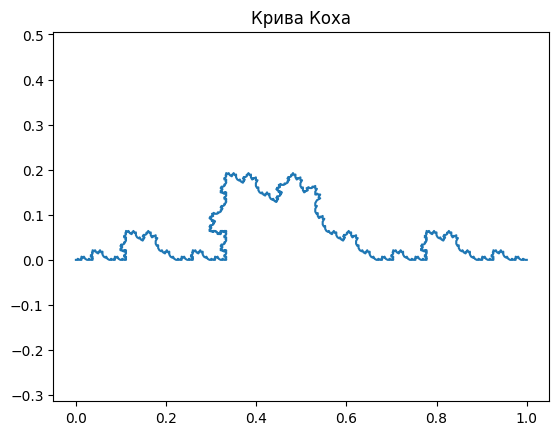

In [2]:
def koch_curve(start, end, order):
    if order == 0:
        return [start, end]
    else:
        v = end - start
        p1 = start + v / 3
        p3 = start + 2 * v / 3
        p2 = p1 + np.dot(np.array([[0, -1], [1, 0]]), p3 - p1) / np.sqrt(3)

        line1 = koch_curve(start, p1, order - 1)
        line2 = koch_curve(p1, p2, order - 1)
        line3 = koch_curve(p2, p3, order - 1)
        line4 = koch_curve(p3, end, order - 1)

        return np.vstack([line1, line2[1:], line3[1:], line4])

def main():
    order = int(input("Введіть рівень рекурсії: "))

    start = np.array([0, 0])
    end = np.array([1, 0])

    points = koch_curve(start, end, order)
    plt.plot(points[:, 0], points[:, 1])
    plt.title('Крива Коха')
    plt.axis('equal')
    plt.show()

if __name__ == "__main__":
    main()

**Завдання 3**

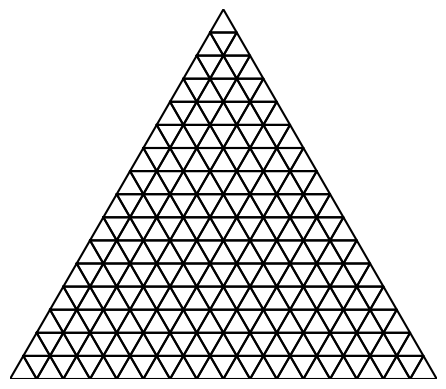

In [3]:
def draw_triangle(ax, p1, p2, p3):
    ax.plot([p1[0], p2[0], p3[0], p1[0]], [p1[1], p2[1], p3[1], p1[1]], 'k')

def serpinski_carpet(ax, p1, p2, p3, depth):
    if depth == 0:
        draw_triangle(ax, p1, p2, p3)
    else:
        p12 = ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
        p23 = ((p2[0] + p3[0]) / 2, (p2[1] + p3[1]) / 2)
        p31 = ((p3[0] + p1[0]) / 2, (p3[1] + p1[1]) / 2)

        serpinski_carpet(ax, p1, p12, p31, depth - 1)
        serpinski_carpet(ax, p12, p2, p23, depth - 1)
        serpinski_carpet(ax, p31, p23, p3, depth - 1)
        serpinski_carpet(ax, p12, p23, p31, depth - 1)

# Основна функція для малювання килима Серпінського
def main():
    p1 = np.array([0, 0])
    p2 = np.array([1, 0])
    p3 = np.array([0.5, np.sqrt(3) / 2])
    depth = 4

    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'box')
    serpinski_carpet(ax, p1, p2, p3, depth)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, np.sqrt(3) / 2)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()